In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\emman\\Desktop\\ML-Zoomcamp\\raw.githubusercontent.com_alexeygrigorev_datasets_master_housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

In [4]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
df = df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]

In [6]:
df['ocean_proximity'].value_counts()

<1H OCEAN    9136
INLAND       6551
Name: ocean_proximity, dtype: int64

In [7]:
df.T

,701,830,859,860,861,862,863,870,880,881,...,20630,20631,20632,20633,20634,20635,20636,20637,20638,20639
longitude,-121.97,-121.99,-121.97,-121.96,-121.98,-121.99,-122.0,-121.93,-121.99,-121.99,...,-121.32,-121.4,-121.45,-121.53,-121.56,-121.09,-121.21,-121.22,-121.32,-121.24
latitude,37.64,37.61,37.57,37.58,37.58,37.58,37.58,37.49,37.56,37.56,...,39.29,39.33,39.26,39.19,39.27,39.48,39.49,39.43,39.43,39.37
housing_median_age,32.0,9.0,21.0,15.0,20.0,31.0,6.0,5.0,18.0,20.0,...,11.0,15.0,15.0,27.0,28.0,25.0,18.0,17.0,18.0,16.0
total_rooms,1283.0,3666.0,4342.0,3575.0,4126.0,2878.0,4405.0,1150.0,5505.0,6462.0,...,2640.0,2655.0,2319.0,2080.0,2332.0,1665.0,697.0,2254.0,1860.0,2785.0
total_bedrooms,194.0,711.0,783.0,597.0,1031.0,478.0,717.0,311.0,1005.0,1294.0,...,505.0,493.0,416.0,412.0,395.0,374.0,150.0,485.0,409.0,616.0
population,485.0,2341.0,2172.0,1777.0,2079.0,1276.0,2071.0,648.0,2641.0,3288.0,...,1257.0,1200.0,1047.0,1082.0,1041.0,845.0,356.0,1007.0,741.0,1387.0
households,171.0,703.0,789.0,559.0,975.0,485.0,688.0,245.0,971.0,1235.0,...,445.0,432.0,385.0,382.0,344.0,330.0,114.0,433.0,349.0,530.0
median_income,6.0574,4.6458,4.6146,5.7192,3.6832,6.2073,5.8151,3.5714,5.0,4.3393,...,3.5673,3.5179,3.125,2.5495,3.7125,1.5603,2.5568,1.7,1.8672,2.3886
median_house_value,431000.0,217000.0,247600.0,283500.0,216900.0,282500.0,295600.0,300000.0,269700.0,231200.0,...,112000.0,107200.0,115600.0,98300.0,116800.0,78100.0,77100.0,92300.0,84700.0,89400.0
ocean_proximity,<1H OCEAN,<1H OCEAN,<1H OCEAN,<1H OCEAN,<1H OCEAN,<1H OCEAN,<1H OCEAN,<1H OCEAN,<1H OCEAN,<1H OCEAN,...,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND


#Fill missing values with zeros.

In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(0)
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#Apply the log transform to median_house_value.

In [10]:
df['median_house_value'] = np.log(df['median_house_value'])
df['median_house_value']

701      12.973863
830      12.287653
859      12.419570
860      12.554967
861      12.287192
           ...    
20635    11.265745
20636    11.252859
20637    11.432799
20638    11.346871
20639    11.400876
Name: median_house_value, Length: 15687, dtype: float64

#Do train/validation/test split with 60%/20%/20% distribution. Use the train_test_split function and set the random_state parameter to 1.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full, test_size=0.25, random_state=1)

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
#get y values

y_train = df_train['median_house_value'].values
y_val = df_val['median_house_value'].values
y_test = df_test['median_house_value'].values

In [15]:
# delete the target values from the dataframe

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [16]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-120.25,37.93,13.0,493.0,76.0,196.0,68.0,3.3750,INLAND
1,-118.40,34.00,10.0,1526.0,339.0,705.0,268.0,5.8083,<1H OCEAN
2,-121.67,38.85,46.0,645.0,131.0,410.0,122.0,1.7417,INLAND
3,-118.14,33.88,24.0,3305.0,982.0,2085.0,881.0,2.6641,<1H OCEAN
4,-118.11,33.92,34.0,1414.0,263.0,983.0,264.0,4.1767,<1H OCEAN


In [17]:
df_val.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.74,38.48,12.0,4174.0,670.0,1882.0,647.0,4.5510,<1H OCEAN
1,-121.67,36.93,22.0,569.0,132.0,542.0,125.0,2.1875,<1H OCEAN
2,-120.90,39.95,20.0,1349.0,238.0,601.0,203.0,3.5417,INLAND
3,-118.14,34.02,44.0,1715.0,460.0,1740.0,423.0,2.7019,<1H OCEAN
4,-118.11,33.80,36.0,1837.0,319.0,810.0,305.0,4.3897,<1H OCEAN


In [18]:
df_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.02,37.32,27.0,4336.0,754.0,2009.0,734.0,6.3923,<1H OCEAN
1,-121.32,37.97,43.0,2453.0,490.0,1093.0,438.0,2.9107,INLAND
2,-115.37,32.81,23.0,1458.0,294.0,866.0,275.0,2.3594,INLAND
3,-118.02,34.08,31.0,2402.0,632.0,2830.0,603.0,2.3333,INLAND
4,-120.50,37.30,29.0,1572.0,456.0,1697.0,429.0,1.7600,INLAND


#Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [19]:
from sklearn.feature_extraction import DictVectorizer

In [20]:
dv = DictVectorizer(sparse=True)

In [21]:
dict_train = df_train.to_dict(orient='records')

In [22]:
X_train = dv.fit_transform(dict_train)

In [23]:
X_train = X_train.toarray()

In [24]:
X_train

array([[  68.  ,   13.  ,   37.93, ...,  196.  ,   76.  ,  493.  ],
       [ 268.  ,   10.  ,   34.  , ...,  705.  ,  339.  , 1526.  ],
       [ 122.  ,   46.  ,   38.85, ...,  410.  ,  131.  ,  645.  ],
       ...,
       [ 551.  ,   26.  ,   34.01, ..., 1720.  ,  598.  , 3042.  ],
       [ 239.  ,   35.  ,   34.03, ..., 1015.  ,  249.  , 1375.  ],
       [ 245.  ,   25.  ,   36.8 , ..., 1050.  ,  255.  , 1270.  ]])

In [25]:
dict_val = df_val.to_dict(orient='records')
X_val = dv.transform(dict_val)

In [26]:
X_val = X_val.toarray()

In [27]:
X_val

array([[ 647.  ,   12.  ,   38.48, ..., 1882.  ,  670.  , 4174.  ],
       [ 125.  ,   22.  ,   36.93, ...,  542.  ,  132.  ,  569.  ],
       [ 203.  ,   20.  ,   39.95, ...,  601.  ,  238.  , 1349.  ],
       ...,
       [ 343.  ,   25.  ,   33.76, ...,  581.  ,  547.  , 2616.  ],
       [ 316.  ,   21.  ,   36.73, ..., 1347.  ,  358.  , 1702.  ],
       [ 859.  ,   24.  ,   34.06, ..., 2174.  ,  952.  , 4043.  ]])

In [28]:
feature_names = dv.get_feature_names()
feature_names

C:\Users\emman\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

# Question 1.

#Let's train a decision tree regressor to predict the median_house_value variable.

#Train a model with max_depth=1.

#Which feature is used for splitting the data?

In [29]:
from sklearn.tree import DecisionTreeRegressor, export_text

In [30]:
stump = DecisionTreeRegressor(max_depth=1)

In [31]:
stump.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [32]:
y_pred = stump.predict(X_val)
y_pred

array([12.30066427, 12.30066427, 11.60679717, ..., 11.60679717,
       11.60679717, 11.60679717])

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mse = mean_squared_error(y_val, y_pred)
mse

0.20402313995041776

In [35]:
rmse = np.sqrt(mse)
rmse

0.45168920725474254

In [36]:
print(export_text(stump, feature_names = feature_names))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.30]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



# Question 2

#Train a random forest model with these parameters:

#n_estimators=10
#random_state=1
#n_jobs=-1 (optional - to make training faster)

#What's the RMSE of this model on validation?

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rfr = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

In [39]:
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [40]:
y_pred = rfr.predict(X_val)
y_pred

array([12.25506827, 12.07467659, 11.59777905, ..., 11.72981962,
       11.24840573, 11.64112568])

In [41]:
mse = mean_squared_error(y_val, y_pred)
mse

0.06021672434682838

In [42]:
print('rmse :', np.sqrt(mse).round(3))

rmse : 0.245


# Question 3

#Now let's experiment with the n_estimators parameter
#Try different values of this parameter from 10 to 200 with step 10.
#Set random_state to 1.
#Evaluate the model on the validation dataset.

#After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for retrieving the answer.

In [43]:
n = np.arange(10, 201, 10)
n

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])

In [44]:
for n in np.arange(10, 201, 10):
    
    rfr = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rfr.fit(X_train, y_train)
    y_pred = rfr.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)
    
    print('rmse: %s --> %.3f' % (n, np.sqrt(mse)))

rmse: 10 --> 0.245
rmse: 20 --> 0.239
rmse: 30 --> 0.237
rmse: 40 --> 0.235
rmse: 50 --> 0.235
rmse: 60 --> 0.235
rmse: 70 --> 0.235
rmse: 80 --> 0.235
rmse: 90 --> 0.234
rmse: 100 --> 0.234
rmse: 110 --> 0.234
rmse: 120 --> 0.234
rmse: 130 --> 0.234
rmse: 140 --> 0.234
rmse: 150 --> 0.234
rmse: 160 --> 0.233
rmse: 170 --> 0.233
rmse: 180 --> 0.234
rmse: 190 --> 0.234
rmse: 200 --> 0.234


In [45]:
# do the above in a dataframe

scores = []
for n in np.arange(10, 201, 10):
    
    rfr = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rfr.fit(X_train, y_train)
    y_pred = rfr.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse).round(3)
    scores.append((n, rmse))

In [46]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

In [47]:
df_scores.sort_values(by='rmse', ascending=True).head()

,n_estimators,rmse
16,170,0.233
15,160,0.233
9,100,0.234
17,180,0.234
14,150,0.234


Text(0, 0.5, 'RMSE')

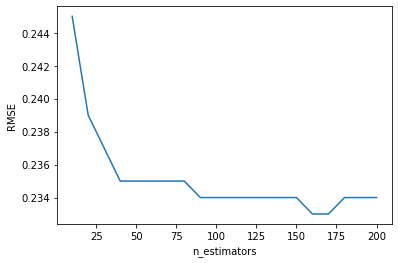

In [48]:
plt.plot(df_scores['n_estimators'], df_scores['rmse'])
plt.xlabel('n_estimators')
plt.ylabel('RMSE')

<AxesSubplot:xlabel='n_estimators', ylabel='rmse'>

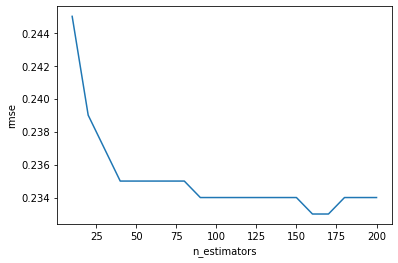

In [49]:
sns.lineplot(data=df_scores, x='n_estimators', y='rmse')

# Question 4

#Let's select the best max_depth:

#Try different values of max_depth: [10, 15, 20, 25]
#For each of these values,
#try different values of n_estimators from 10 till 200 (with step 10)
#calculate the mean RMSE
#Fix the random seed: random_state=1

#What's the best max_depth, using the mean RMSE?

In [50]:
np.arange(10, 26, 5)

array([10, 15, 20, 25])

In [51]:
scores = []

for d in np.arange(10, 26, 5):
    for n in np.arange(10, 201, 10):
        rfr = RandomForestRegressor(max_depth=d, n_estimators=n, random_state=1, n_jobs=-1)
        rfr.fit(X_train, y_train)
        
        y_pred = rfr.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        rmse = np.sqrt(mse)
        
        scores.append((d, n, rmse))

In [52]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'rmse'])
df_scores.head()

,max_depth,n_estimators,rmse
0,10,10,0.251031
1,10,20,0.247365
2,10,30,0.246326
3,10,40,0.245064
4,10,50,0.245402


In [53]:
df_scores.sort_values(by='rmse', ascending=True)

,max_depth,n_estimators,rmse
55,20,160,0.232994
56,20,170,0.233037
54,20,150,0.233109
53,20,140,0.233118
57,20,180,0.233279
...,...,...,...
8,10,90,0.245530
7,10,80,0.245668
2,10,30,0.246326
1,10,20,0.247365


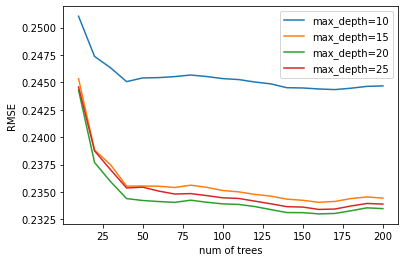

In [54]:
for d in np.arange(10,26,5):
    df_subset = df_scores[df_scores['max_depth'] == d]
    plt.plot(df_subset['n_estimators'], df_subset['rmse'], label = 'max_depth=%s' % d)
    plt.ylabel('RMSE')
    plt.xlabel('num of trees')
    
plt.legend()                      

# Question 5

#Train the model with these parameters:
#n_estimators=10,
#max_depth=20,
#random_state=1,
#n_jobs=-1 (optional)

#Get the feature importance information from this model: What's the most important feature?

In [55]:
rfr = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)

In [56]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [57]:
rfr.feature_importances_

array([0.01455543, 0.03032307, 0.1015149 , 0.08709334, 0.33574968,
       0.03529711, 0.33098244, 0.02834515, 0.01515447, 0.0209844 ])

In [58]:
dv.get_feature_names_out()

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=<1H OCEAN',
       'ocean_proximity=INLAND', 'population', 'total_bedrooms',
       'total_rooms'], dtype=object)

In [59]:
feature_importance = list(zip(rfr.feature_importances_, dv.get_feature_names_out()))
feature_importance.sort()
feature_importance

[(0.014555433639129112, 'households'),
 (0.015154470388830596, 'total_bedrooms'),
 (0.02098439729588685, 'total_rooms'),
 (0.028345150071234615, 'population'),
 (0.030323074073114614, 'housing_median_age'),
 (0.035297113178256095, 'ocean_proximity=<1H OCEAN'),
 (0.08709333928795959, 'longitude'),
 (0.1015149049221652, 'latitude'),
 (0.33098243681580797, 'ocean_proximity=INLAND'),
 (0.3357496803276153, 'median_income')]

# Question 6

#Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

#Create DMatrix for train and validation

#Create a watchlist

#Train a model with these parameters for 100 rounds:

#Now change eta from 0.3 to 0.1.

#Which eta leads to the best RMSE score on the validation dataset?

In [60]:
!pip install xgboost

In [61]:
import xgboost as xgb

In [62]:
feature_names

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

In [63]:
feature_names[5] = feature_names[5].replace('=<', '_')
feature_names

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity_1H OCEAN',
 'ocean_proximity=INLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

In [64]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=feature_names)

In [65]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [66]:
y_pred = model.predict(dval)

In [67]:
mse = mean_squared_error(y_val, y_pred)
mse

0.0523181084310268

In [68]:
print('rmse :', '%s --> %s' % (xgb_params['eta'], np.sqrt(mse)))

rmse : 0.3 --> 0.22873152041427697


In [69]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [70]:
y_pred = model.predict(dval)
mse = mean_squared_error(y_val, y_pred)
mse

0.05386629861289511

In [71]:
print('rmse :', '%s --> %s' % (xgb_params['eta'], np.sqrt(mse)))

rmse : 0.1 --> 0.23209114290057498


#Watchlist resolution below:

In [72]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [73]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, evals=watchlist, verbose_eval=5, num_boost_round=100)

[0]	train-rmse:0.44351	val-rmse:0.44250
[5]	train-rmse:0.25338	val-rmse:0.27463
[10]	train-rmse:0.21445	val-rmse:0.25179
[15]	train-rmse:0.19858	val-rmse:0.24523
[20]	train-rmse:0.18524	val-rmse:0.23978
[25]	train-rmse:0.17757	val-rmse:0.23830
[30]	train-rmse:0.16888	val-rmse:0.23571
[35]	train-rmse:0.16113	val-rmse:0.23416
[40]	train-rmse:0.15542	val-rmse:0.23319
[45]	train-rmse:0.14941	val-rmse:0.23190
[50]	train-rmse:0.14536	val-rmse:0.23225
[55]	train-rmse:0.14150	val-rmse:0.23197
[60]	train-rmse:0.13719	val-rmse:0.23139
[65]	train-rmse:0.13260	val-rmse:0.23158
[70]	train-rmse:0.12943	val-rmse:0.23068
[75]	train-rmse:0.12555	val-rmse:0.23039
[80]	train-rmse:0.12192	val-rmse:0.22886
[85]	train-rmse:0.11854	val-rmse:0.22888
[90]	train-rmse:0.11504	val-rmse:0.22877
[95]	train-rmse:0.11266	val-rmse:0.22865
[99]	train-rmse:0.11043	val-rmse:0.22873


In [74]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, evals=watchlist, verbose_eval=5, num_boost_round=100)

In [75]:
output.stdout

'[0]\ttrain-rmse:0.44351\tval-rmse:0.44250\n[5]\ttrain-rmse:0.25338\tval-rmse:0.27463\n[10]\ttrain-rmse:0.21445\tval-rmse:0.25179\n[15]\ttrain-rmse:0.19858\tval-rmse:0.24523\n[20]\ttrain-rmse:0.18524\tval-rmse:0.23978\n[25]\ttrain-rmse:0.17757\tval-rmse:0.23830\n[30]\ttrain-rmse:0.16888\tval-rmse:0.23571\n[35]\ttrain-rmse:0.16113\tval-rmse:0.23416\n[40]\ttrain-rmse:0.15542\tval-rmse:0.23319\n[45]\ttrain-rmse:0.14941\tval-rmse:0.23190\n[50]\ttrain-rmse:0.14536\tval-rmse:0.23225\n[55]\ttrain-rmse:0.14150\tval-rmse:0.23197\n[60]\ttrain-rmse:0.13719\tval-rmse:0.23139\n[65]\ttrain-rmse:0.13260\tval-rmse:0.23158\n[70]\ttrain-rmse:0.12943\tval-rmse:0.23068\n[75]\ttrain-rmse:0.12555\tval-rmse:0.23039\n[80]\ttrain-rmse:0.12192\tval-rmse:0.22886\n[85]\ttrain-rmse:0.11854\tval-rmse:0.22888\n[90]\ttrain-rmse:0.11504\tval-rmse:0.22877\n[95]\ttrain-rmse:0.11266\tval-rmse:0.22865\n[99]\ttrain-rmse:0.11043\tval-rmse:0.22873\n'

In [76]:
results = []

def parse_xgb_output(output):
   
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train= float(train_line.split(':')[1])
        val= float(val_line.split(':')[1])
        
        
        results.append((it, train, val))
        
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [77]:
df_score = parse_xgb_output(output)
df_score

,num_iter,train_rmse,val_rmse
0,0,0.44351,0.44250
1,5,0.25338,0.27463
2,10,0.21445,0.25179
3,15,0.19858,0.24523
4,20,0.18524,0.23978
5,25,0.17757,0.23830
6,30,0.16888,0.23571
7,35,0.16113,0.23416
8,40,0.15542,0.23319
9,45,0.14941,0.23190


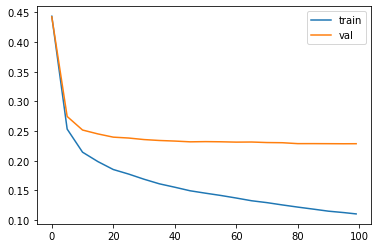

In [78]:
plt.plot(df_score['num_iter'], df_score['train_rmse'], label = 'train')
plt.plot(df_score['num_iter'], df_score['val_rmse'], label = 'val')
plt.legend()

In [79]:
scores = {}

In [80]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, evals=watchlist, verbose_eval=5, num_boost_round=100)

In [81]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

In [82]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, evals=watchlist, verbose_eval=5, num_boost_round=100)

In [86]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [87]:
scores.keys()

dict_keys(['eta=0.3', 'eta=0.1'])

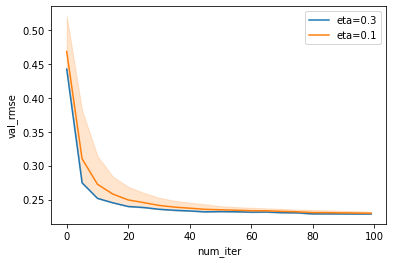

In [92]:
for key, df_score in scores.items():
    sns.lineplot(data = df_score, x='num_iter', y='val_rmse', label=key)